Netflix Business case

Problem statement

Analyze the data and generated insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [247]:
df = pd.read_csv('Netflix.csv')

In [248]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

date_added is converted to DateTime format

In [249]:
type(df["date_added"][0]) ### type of date_added is in string format, we will change it in datetime format

str

In [250]:
df["date_added"]=pd.to_datetime(df["date_added"])

In [251]:
type(df["date_added"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


Handling missing values

In [253]:
df['director'].replace(np.nan, 'unknown_director_name', inplace=True)

In [254]:
df['cast'].replace(np.nan, 'unknown_cast_name', inplace=True)

In [255]:
movie_rating = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]


df['rating'] = df.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
                        else tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
                        else x['rating'], axis=1)

In [256]:
movie_duration_mode = df.loc[df['type'] == 'Movie', 'duration'].mode()[0]
tv_duration_mode = df.loc[df['type'] == 'TV Show', 'duration'].mode()[0]


df['rating'] = df.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
                        else tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
                        else x['rating'], axis=1)

In [257]:
df.dropna(inplace=True)

In [258]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7964 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7964 non-null   object        
 1   type          7964 non-null   object        
 2   title         7964 non-null   object        
 3   director      7964 non-null   object        
 4   cast          7964 non-null   object        
 5   country       7964 non-null   object        
 6   date_added    7964 non-null   datetime64[ns]
 7   release_year  7964 non-null   int64         
 8   rating        7964 non-null   object        
 9   duration      7964 non-null   object        
 10  listed_in     7964 non-null   object        
 11  description   7964 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 808.8+ KB


Un-nesting the columns with multiple values with seperated with comma ", "


In [259]:
df_dir=df[["title", "director"]]
df_dir["director"]=df_dir["director"].str.split(", ")   ### spliting the columns and using explode
df_dir=df_dir.explode("director")

In [260]:
df_c=df[["title", "cast"]]
df_c["cast"]=df_c["cast"].str.split(", ")
df_c=df_c.explode("cast")

In [261]:
df_li=df[["title", "listed_in"]]
df_li["listed_in"]=df_li["listed_in"].str.split(", ")
df_li=df_li.explode("listed_in")

In [262]:
df_co=df[["title", "country"]]
df_co["country"]=df_co["country"].str.split(", ")
df_co=df_co.explode("country")

Merging the columns after spliting and expanding the columns

In [263]:
df1=pd.merge(df,df_dir, on="title")

In [264]:
df1=pd.merge(df1,df_c, on="title")

In [265]:
df1=pd.merge(df1,df_li, on="title")

In [266]:
df1=pd.merge(df1,df_co, on="title")

In [267]:
df1.drop(columns=["director_x","cast_x","country_x","listed_in_x"],inplace=True)

In [268]:
df1.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director_y,cast_y,listed_in_y,country_y
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,unknown_cast_name,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",unknown_director_name,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",unknown_director_name,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",unknown_director_name,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",unknown_director_name,Khosi Ngema,International TV Shows,South Africa


In [269]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189934 entries, 0 to 189933
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       189934 non-null  object        
 1   type          189934 non-null  object        
 2   title         189934 non-null  object        
 3   date_added    189934 non-null  datetime64[ns]
 4   release_year  189934 non-null  int64         
 5   rating        189934 non-null  object        
 6   duration      189934 non-null  object        
 7   description   189934 non-null  object        
 8   director_y    189934 non-null  object        
 9   cast_y        189934 non-null  object        
 10  listed_in_y   189934 non-null  object        
 11  country_y     189934 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.8+ MB


Making two different tables for Movies and TV_shows

In [270]:
movie=df1.loc[df1["type"]=="Movie"]

In [271]:
tv=df1.loc[df1["type"]=="TV Show"]

Distribution of Content Types

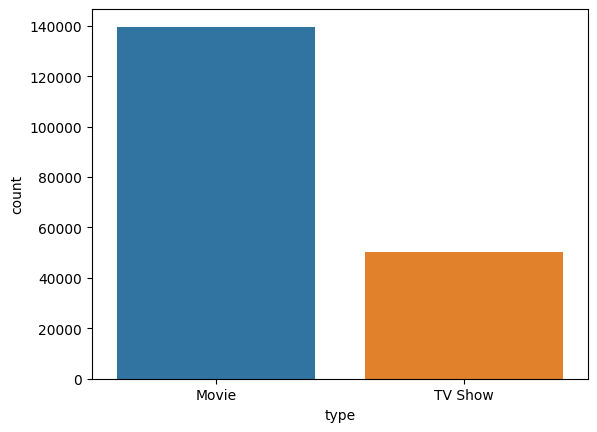

In [272]:
sns.countplot(data=df1,x='type')
plt.show()


Based on the above chart it is seen that movies are added more than tv shows



Relation between type and Rating plot

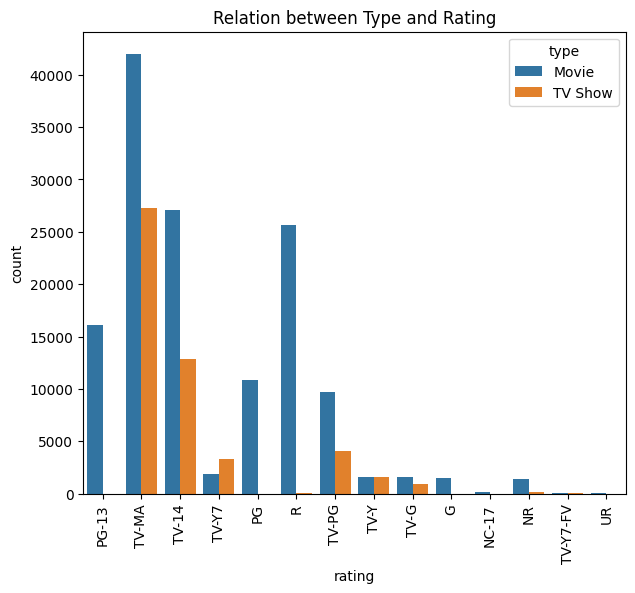

In [273]:
plt.figure(figsize=(7,6))
sns.countplot(x='rating',hue='type', data=df1)
plt.xticks(rotation=90)
plt.title('Relation between Type and Rating')
plt.show()

Majority of the rating is TV-MA and TV-14

TV-14 - these shows may be unsuitable for children under 14

TV-MA - these programs are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17

Distribution of movies and TV_show

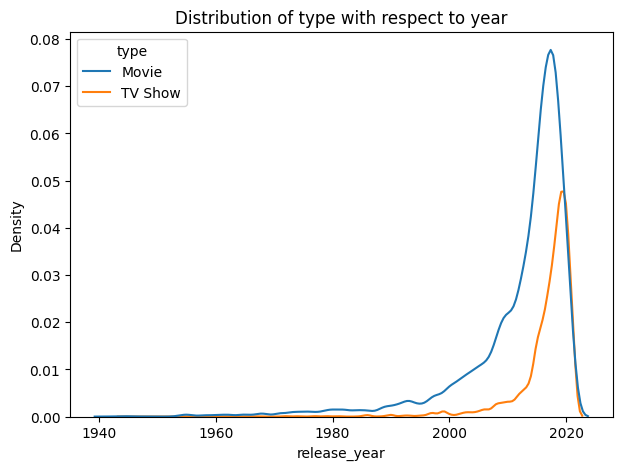

In [275]:
plt.figure(figsize=(7,5))
sns.kdeplot(x='release_year',
            hue='type',
            data=df1)
plt.title("Distribution of type with respect to year")
plt.show()

Majority of the movies are released from approx 2008 to 2022 and TV_shows are from approx 2012 to 2022


Top 5 country which produce highest movies

In [276]:
movie.groupby(["country_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

country_y
United States     2748
India              962
United Kingdom     532
Canada             319
France             303
Name: show_id, dtype: int64

In [277]:
aj=movie.groupby(["country_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
i=aj.index
j=aj.values

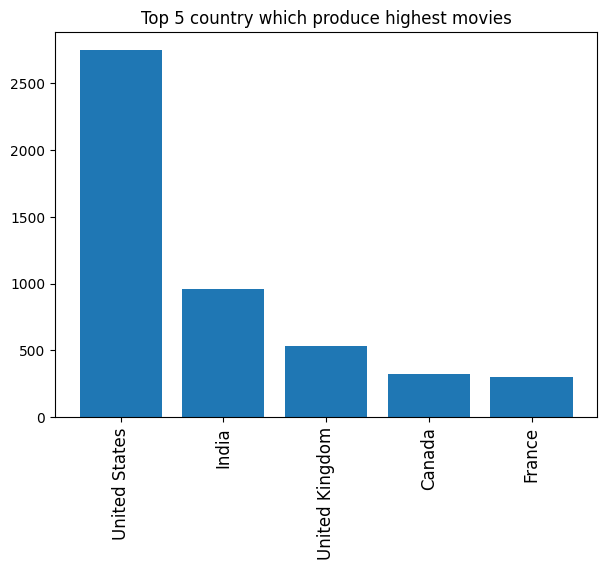

In [278]:
plt.figure(figsize=(7,5))
plt.bar(i, j)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 country which produce highest movies")
plt.show()

Top 5 country which produce highest TV_shows

In [279]:
tv.groupby(["country_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

country_y
United States     932
United Kingdom    271
Japan             198
South Korea       170
Canada            126
Name: show_id, dtype: int64

In [280]:
bb=tv.groupby(["country_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
f=bb.index
p=bb.values

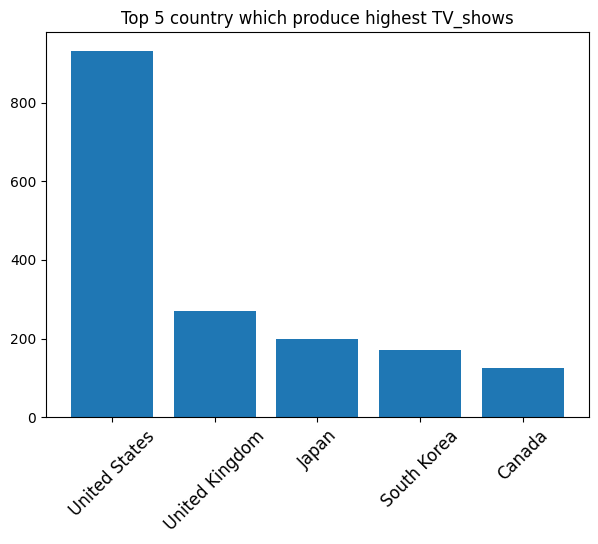

In [281]:
plt.figure(figsize=(7,5))
plt.bar(f, p)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 country which produce highest TV_shows")
plt.show()

Top 5 Genre(listed_in) of Movies

In [282]:

movie.groupby(["listed_in_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

listed_in_y
International Movies    2543
Dramas                  2317
Comedies                1580
Action & Adventure       817
Documentaries            794
Name: show_id, dtype: int64

In [283]:
li=movie.groupby(["listed_in_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
v=li.index
r=li.values

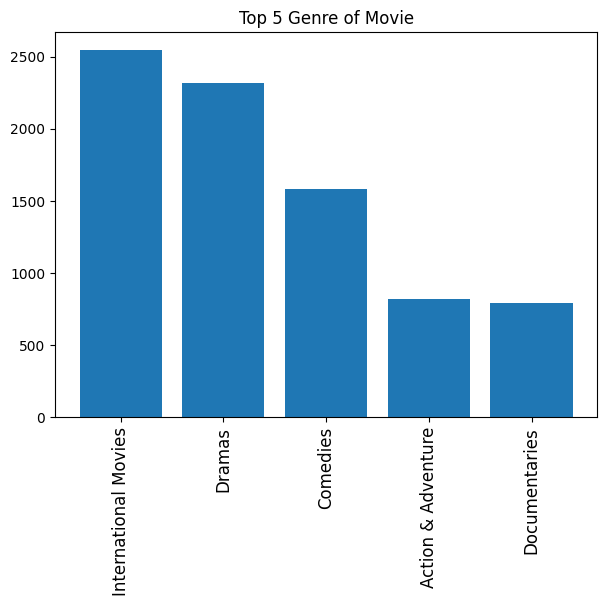

In [284]:
plt.figure(figsize=(7,5))
plt.bar(v, r)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 Genre of Movie")
plt.show()

Top 5 Genre of TV_shows

In [285]:
tv.groupby(["listed_in_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

listed_in_y
International TV Shows    1127
TV Dramas                  662
TV Comedies                494
Crime TV Shows             420
Kids' TV                   369
Name: show_id, dtype: int64

In [286]:
bv=tv.groupby(["listed_in_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
ty=bv.index
ui=bv.values

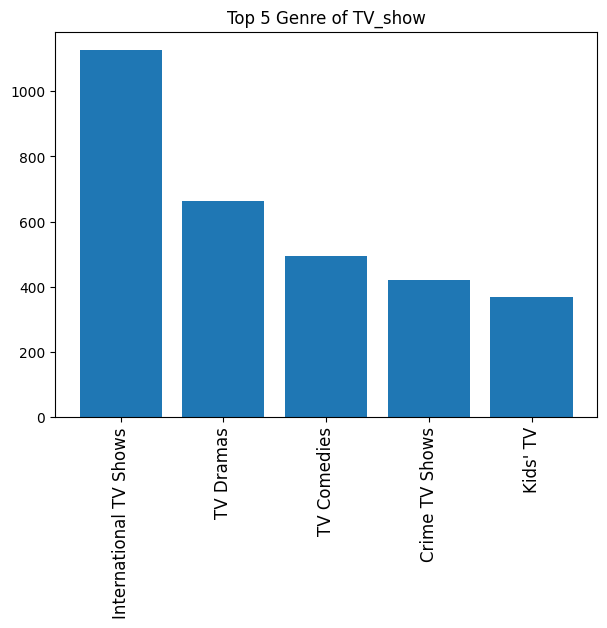

In [287]:
plt.figure(figsize=(7,5))
plt.bar(ty, ui)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 Genre of TV_show")
plt.show()

Top 5 rated movie

In [288]:
movie.groupby(["rating"])["show_id"].nunique().sort_values(ascending=False).head(5)

rating
TV-MA    1925
TV-14    1307
R         787
TV-PG     504
PG-13     482
Name: show_id, dtype: int64

In [289]:
dr=movie.groupby(["rating"])["show_id"].nunique().sort_values(ascending=False).head(5)
o=dr.index
q=dr.values

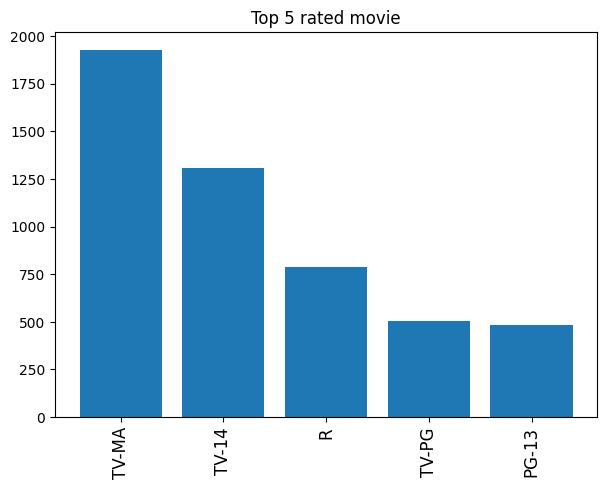

In [290]:
plt.figure(figsize=(7,5))
plt.bar(o, q)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 rated movie")
plt.show()

Top 5 rated TV_show

In [293]:
tv.groupby(["rating"])["show_id"].nunique().sort_values(ascending=False).head(5)

rating
TV-MA    1007
TV-14     620
TV-PG     267
TV-Y7     152
TV-Y      143
Name: show_id, dtype: int64

In [294]:
tt=tv.groupby(["rating"])["show_id"].nunique().sort_values(ascending=False).head(5)
x1=tt.index
x2=tt.values

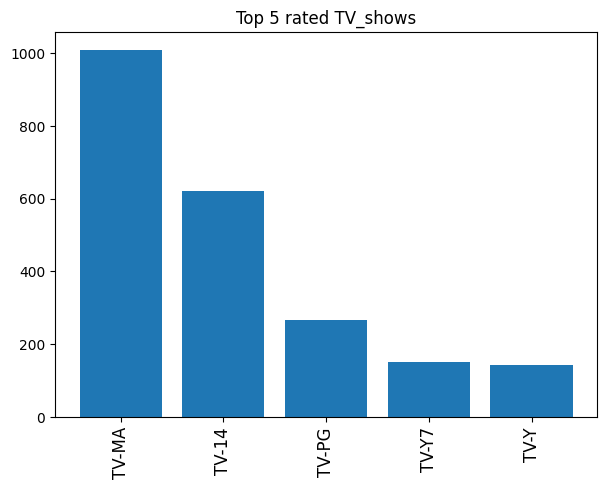

In [295]:
plt.figure(figsize=(7,5))
plt.bar(x1, x2)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 rated TV_shows")
plt.show()

Top 5 producing director for movies

In [296]:
movie.groupby(["director_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

director_y
unknown_director_name    129
Jan Suter                 21
Raúl Campos               19
Jay Karas                 15
Marcus Raboy              14
Name: show_id, dtype: int64

In [297]:
hg=movie.groupby(["director_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
tr=hg.index
ru=hg.values

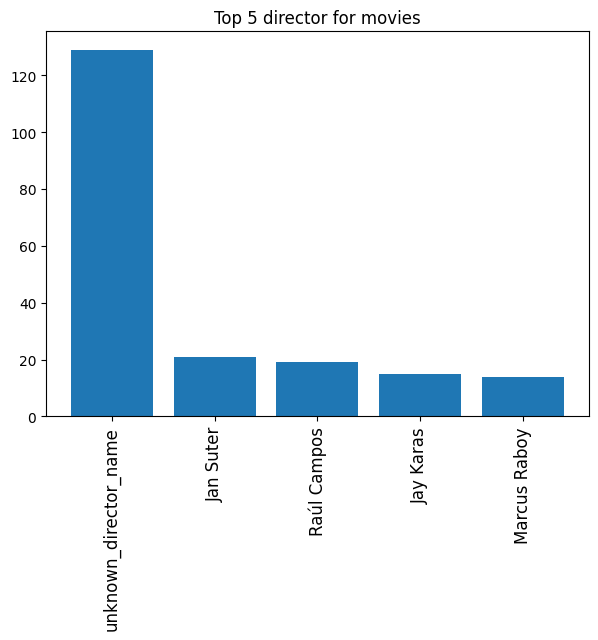

In [298]:
plt.figure(figsize=(7,5))
plt.bar(tr, ru)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 director for movies")
plt.show()

Top 5 director for TV_show

In [299]:
tv.groupby(["director_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

director_y
unknown_director_name    2087
Ken Burns                   3
Alastair Fothergill         3
Jung-ah Im                  2
Iginio Straffi              2
Name: show_id, dtype: int64

In [300]:
hg=tv.groupby(["director_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
jr=hg.index
tu=hg.values

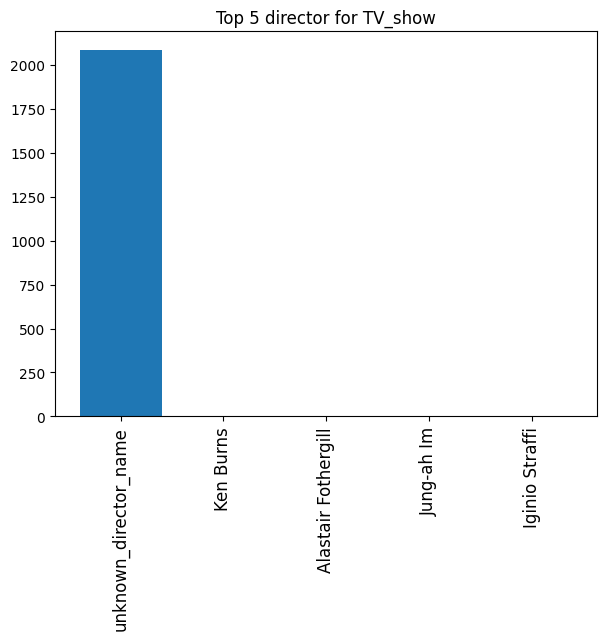

In [301]:
plt.figure(figsize=(7,5))
plt.bar(jr, tu)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 director for TV_show")
plt.show()

Top 5 actor in movies

In [302]:
movie.groupby(["cast_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

cast_y
unknown_cast_name    410
Anupam Kher           42
Shah Rukh Khan        34
Naseeruddin Shah      31
Om Puri               30
Name: show_id, dtype: int64

In [303]:
hg=movie.groupby(["cast_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
t1=hg.index
r1=hg.values

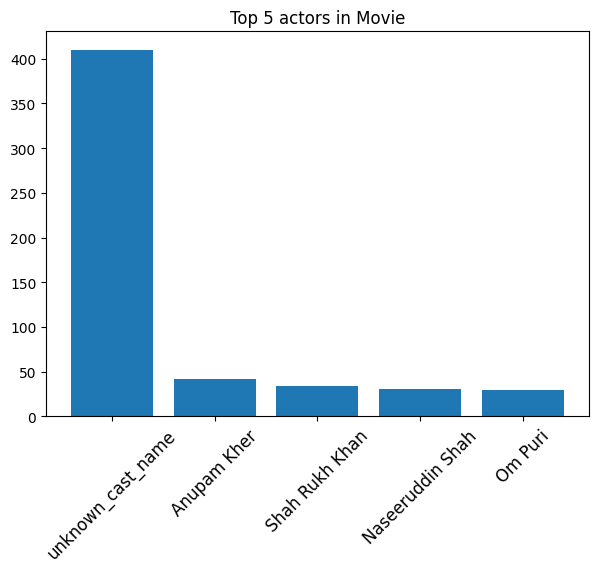

In [304]:
plt.figure(figsize=(7,5))
plt.bar(t1, r1)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 actors in Movie")
plt.show()

Top 5 actors in TV_shows

In [305]:
tv.groupby(["cast_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

cast_y
unknown_cast_name    261
Takahiro Sakurai      22
Yuki Kaji             18
Daisuke Ono           17
Junichi Suwabe        16
Name: show_id, dtype: int64

In [306]:
r5=tv.groupby(["cast_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
y7=r5.index
u7=r5.values

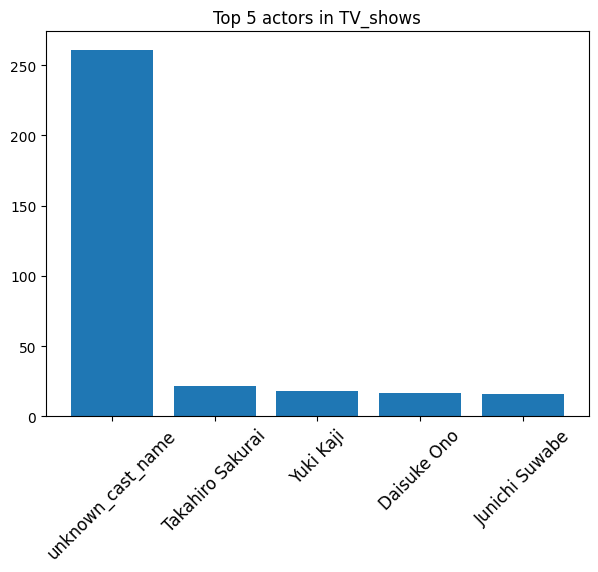

In [307]:
plt.figure(figsize=(7,5))
plt.bar(y7, u7)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 actors in TV_shows")
plt.show()

Top 5 in Movie analysis

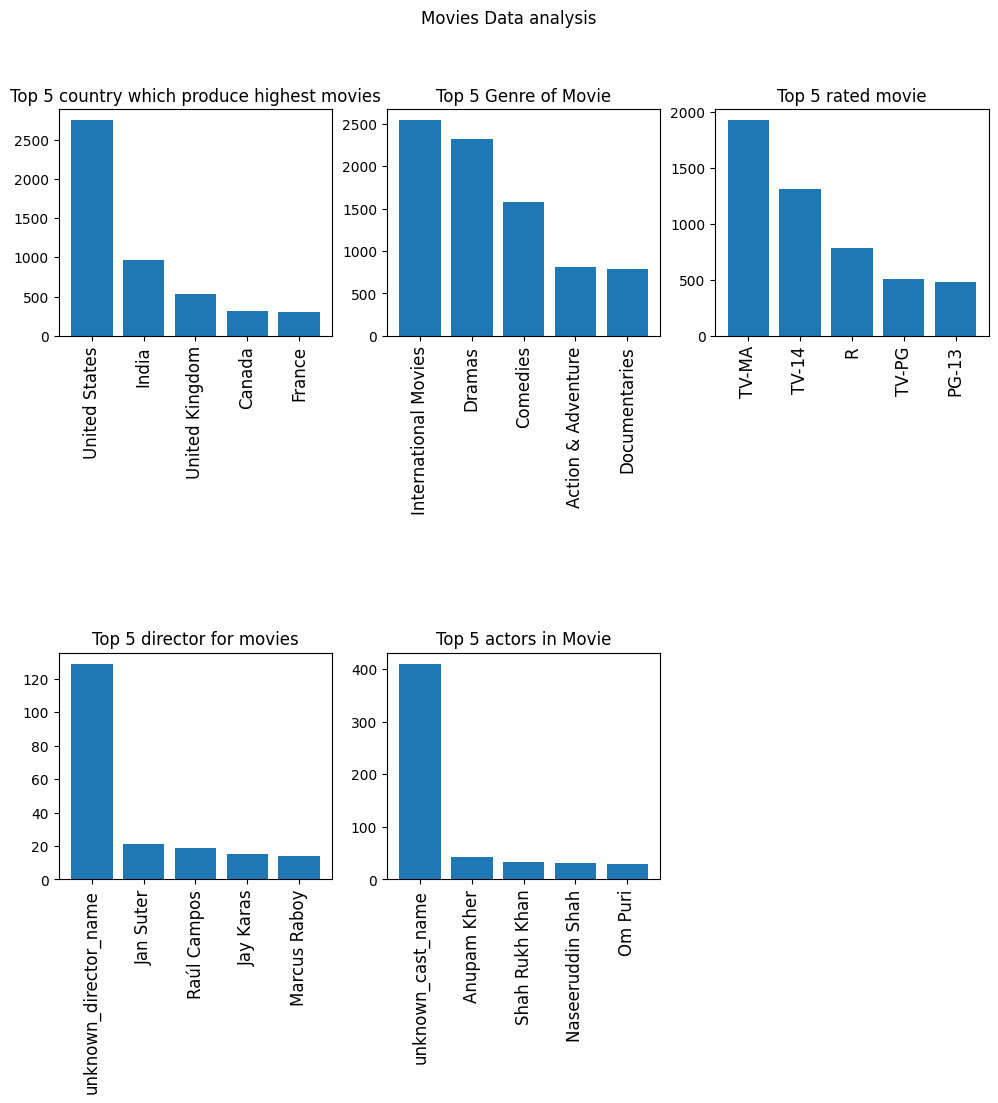

In [308]:
fig=plt.figure(figsize =(12,10))

plt.subplot(3,3,1)

plt.bar(i, j)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 country which produce highest movies")


plt.subplot(3,3,2)
plt.bar(v, r)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 Genre of Movie")

plt.subplot(3,3,3)
plt.bar(o, q)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 rated movie")

plt.subplot(3,3,7)
plt.bar(tr, ru)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 director for movies")

plt.subplot(3,3,8)
plt.bar(t1, r1)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 actors in Movie")

plt.suptitle("Movies Data analysis")
plt.show()

Top 5 TV_show analysis

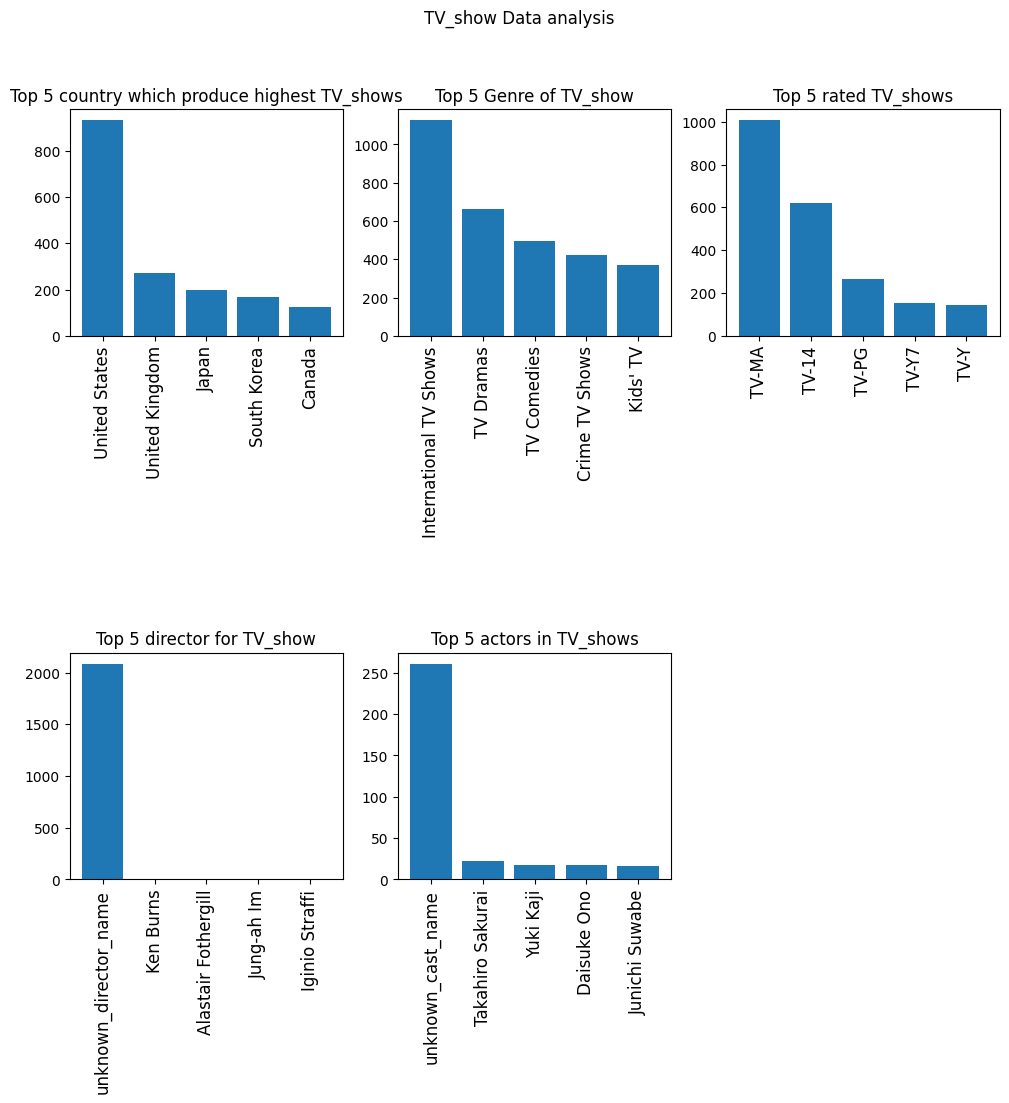

In [309]:
fig=plt.figure(figsize =(12,10))

plt.subplot(3,3,1)

plt.bar(f, p)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 country which produce highest TV_shows")


plt.subplot(3,3,2)
plt.bar(ty, ui)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 Genre of TV_show")

plt.subplot(3,3,3)
plt.bar(x1, x2)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 rated TV_shows")

plt.subplot(3,3,7)
plt.bar(jr, tu)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 director for TV_show")

plt.subplot(3,3,8)
plt.bar(y7, u7)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 actors in TV_shows")

plt.suptitle("TV_show Data analysis")
plt.show()


Best month for movies added in Netflix?

In [310]:
movie.groupby(movie["date_added"].dt.month_name())["show_id"].nunique().sort_values(ascending=False)

date_added
January      527
December     518
October      518
April        511
March        503
July         490
November     483
August       471
September    460
June         443
May          392
February     372
Name: show_id, dtype: int64

Most movies has been added on the month of January

Best day for movies added in Netflix?

In [311]:
movie.groupby(movie["date_added"].dt.day_name())["show_id"].nunique().sort_values(ascending=False)

date_added
Friday       1439
Thursday      973
Wednesday     833
Tuesday       782
Monday        593
Sunday        550
Saturday      518
Name: show_id, dtype: int64

Most movies has been added on Friday

Duration distribution of movies and tv shows

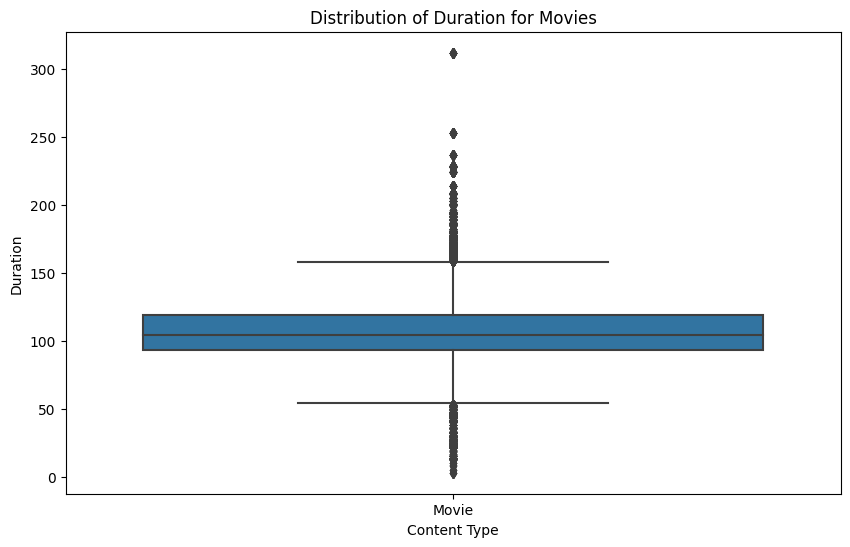

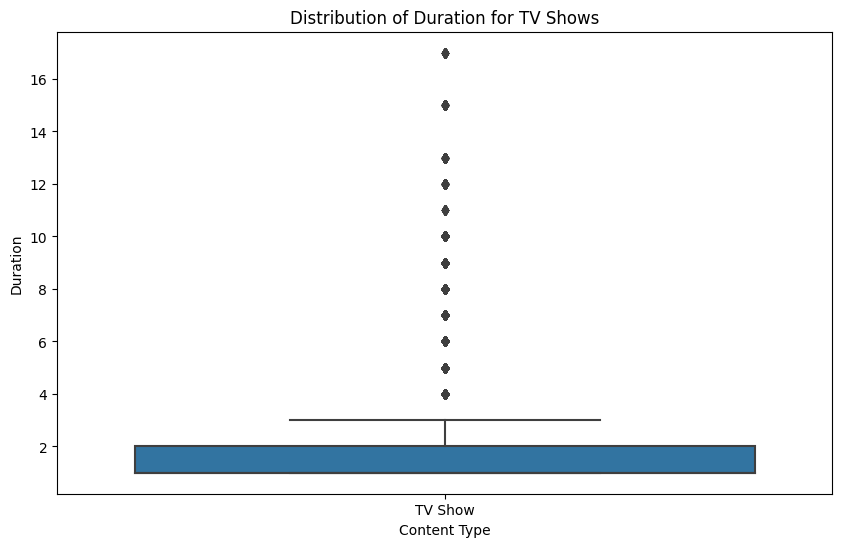

In [312]:
movie['duration'] = movie['duration'].str.extract('(\d+)', expand=False).astype(int)

# Movies
plt.figure(figsize=(10, 6))
sns.boxplot(data=movie, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()


# TV
tv['duration'] = tv['duration'].str.extract('(\d+)', expand=False).astype(int)


plt.figure(figsize=(10, 6))
sns.boxplot(data=tv, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')
plt.show()

Median lenght of movies are 100 minutes

Median length of tv shows are 1 episode

The Trend of Movie/TV Show Lengths Over the Years

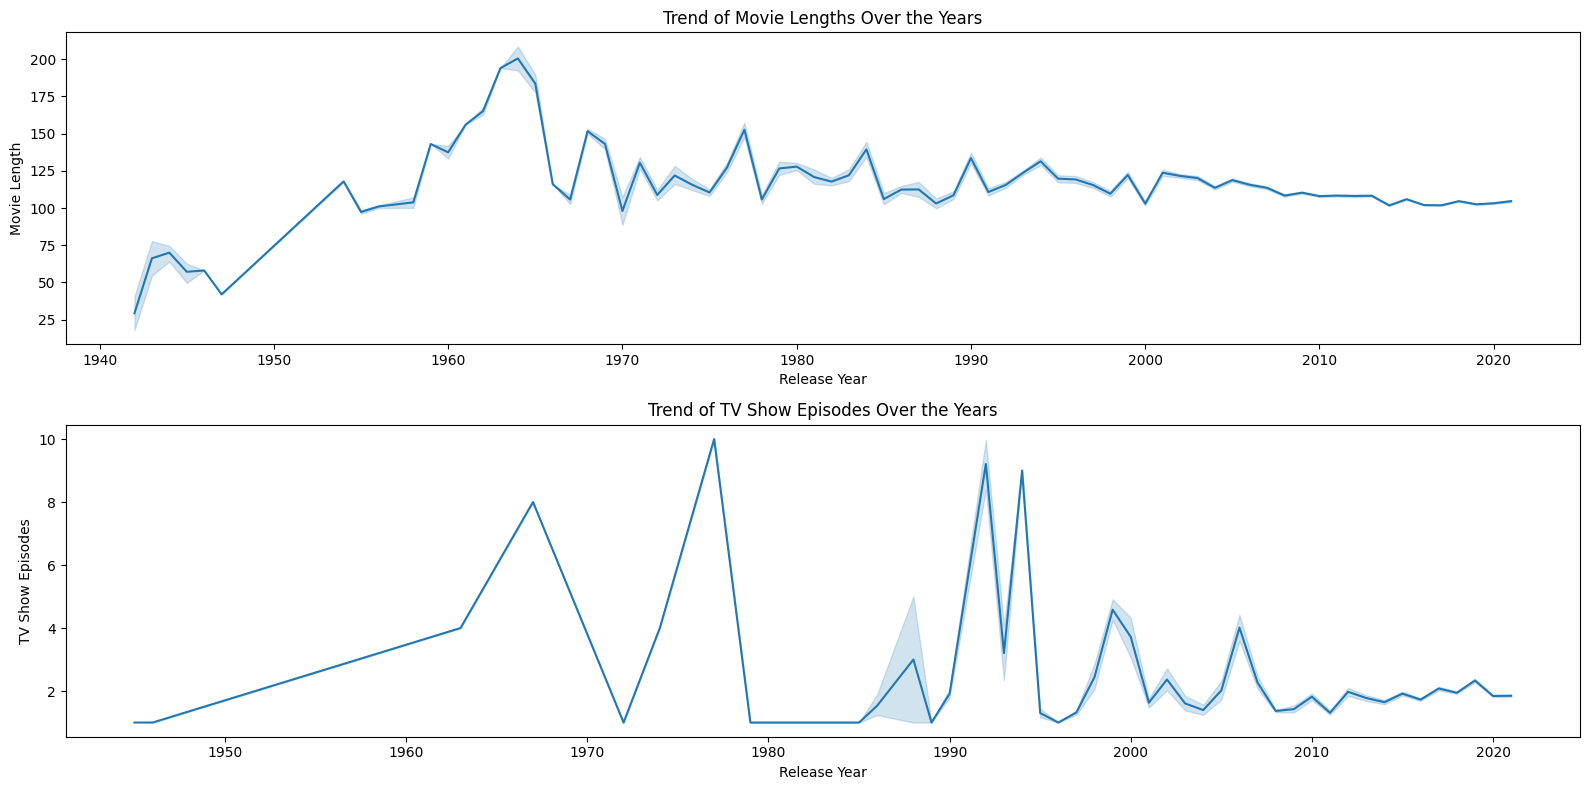

In [313]:
movie_lengths = movie['duration']
tv_show_episodes = tv['duration']


plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
sns.lineplot(data=movie, x='release_year', y=movie_lengths)
plt.xlabel('Release Year')
plt.ylabel('Movie Length')
plt.title('Trend of Movie Lengths Over the Years')

plt.subplot(2, 1, 2)
sns.lineplot(data=tv, x='release_year', y=tv_show_episodes)
plt.xlabel('Release Year')
plt.ylabel('TV Show Episodes')
plt.title('Trend of TV Show Episodes Over the Years')

# Adjust the layout and spacing
plt.tight_layout()


plt.show()

Top 10 Directors by Movie/TV Show Count

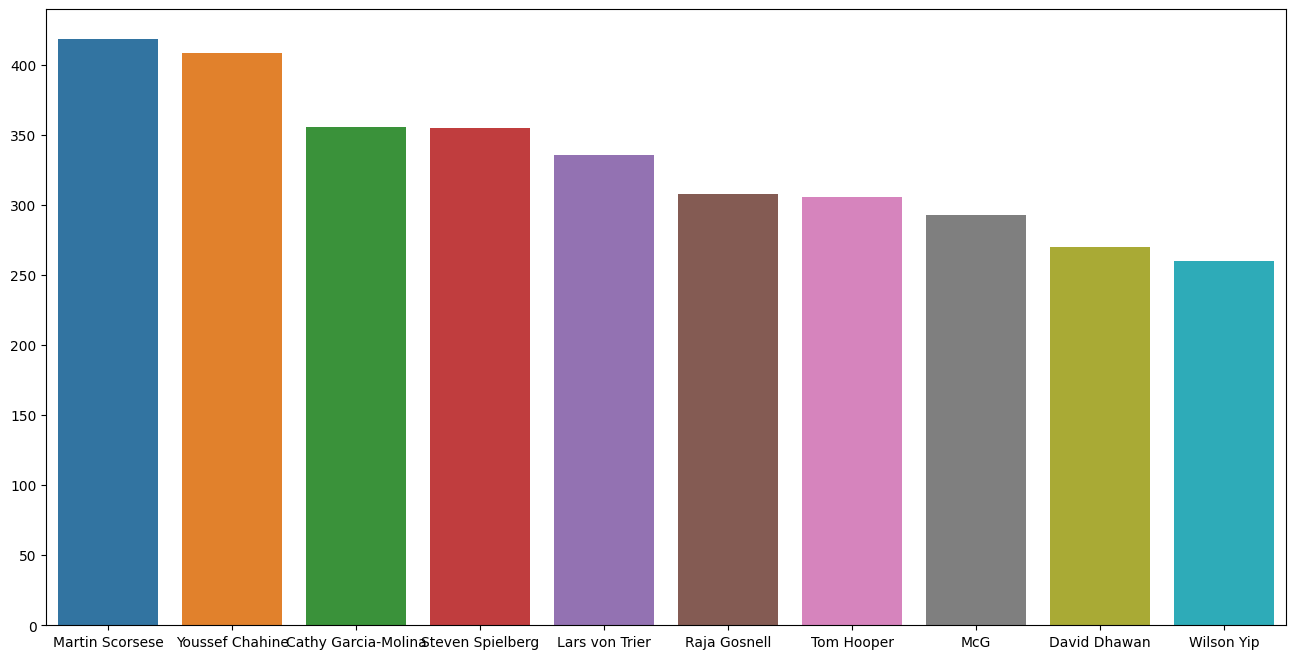

In [314]:
director_counts = df1['director_y'].value_counts()[1:]

top_10_directors = director_counts.head(10)

plt.figure(figsize=(16, 8))

bar_plot = sns.barplot(x=top_10_directors.index, y=top_10_directors.values)

Top 10 genre in movies an tv shows

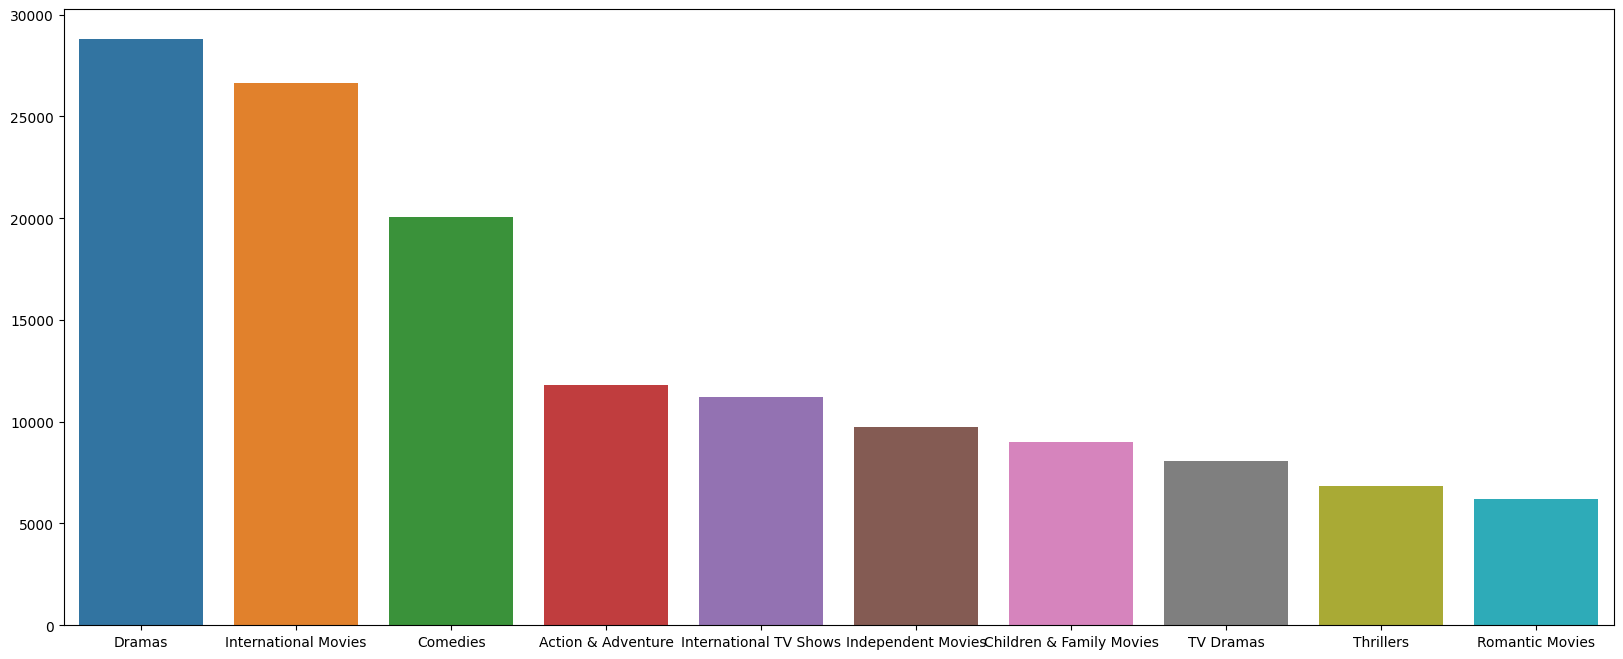

In [315]:
listed_in_counts = df1['listed_in_y'].value_counts()


top_10_listed_in = listed_in_counts.head(10)

plt.figure(figsize=(20, 8))
bar_plot = sns.barplot(x=top_10_listed_in.index, y=top_10_listed_in.values)

Top 10 rating in movies and tv shows

<Axes: >

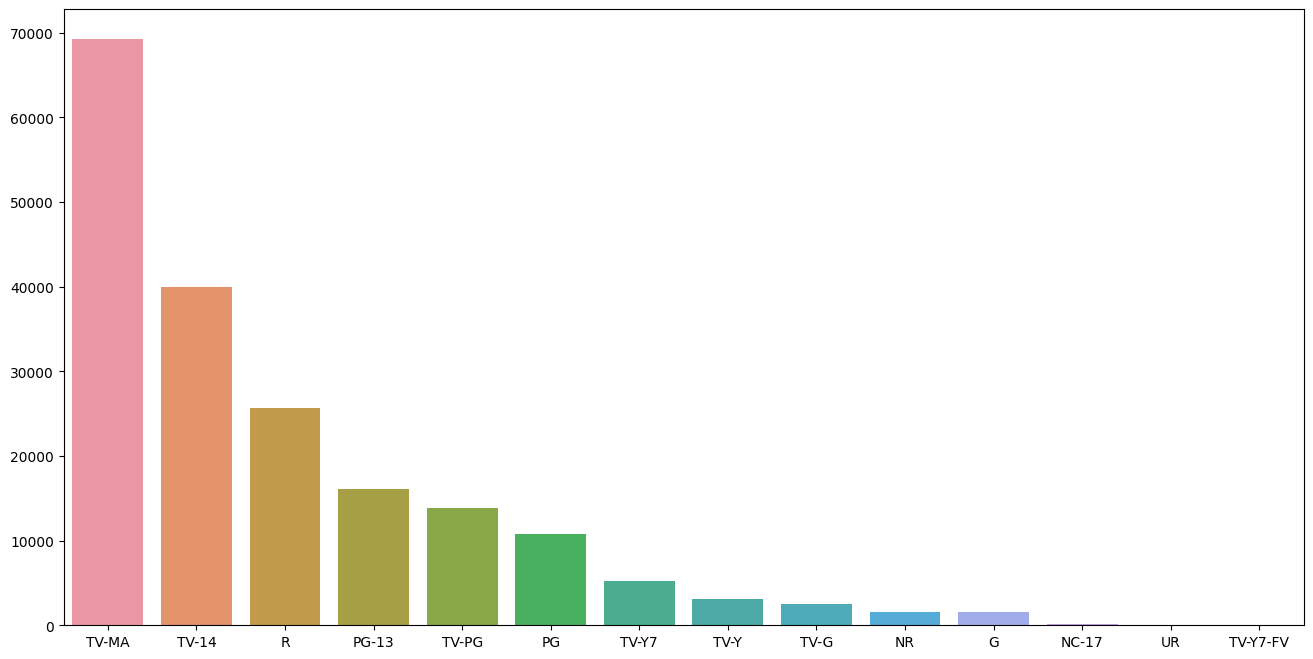

In [316]:
rating_counts = df1['rating'].value_counts()

plt.figure(figsize=(16, 8))
sns.barplot(x=rating_counts.index, y=rating_counts.values)


Scatterplot for release year and duration of movies

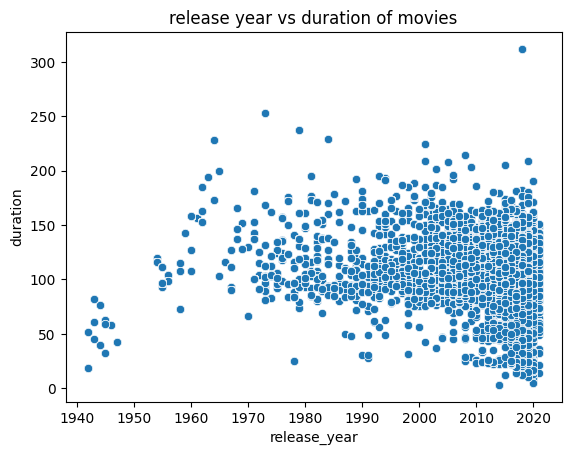

In [319]:
sns.scatterplot(data=movie,
                x="release_year",
               y="duration")
plt.title("release year vs duration of movies")
plt.show()

Pairplot for release year and duration of movies

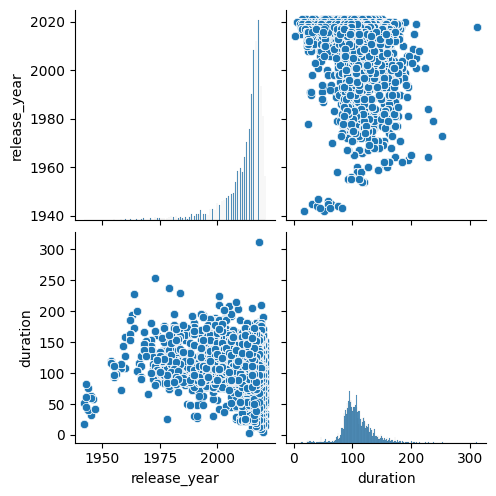

In [320]:
sns.pairplot(data=movie)
plt.show()

Heatmap analysis  for release year and duration of movies

In [321]:
movie.corr()

,release_year,duration
release_year,1.000000,-0.231104
duration,-0.231104,1.000000


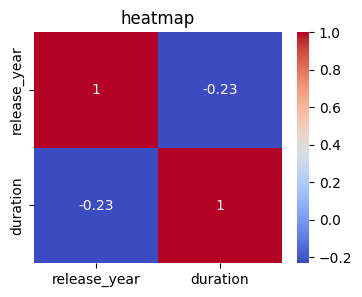

In [322]:
plt.figure(figsize=(4,3))
sns.heatmap(data=movie.corr(),
            annot=True,
           cmap="coolwarm")
plt.title("heatmap")
plt.show()

Based on the heatmap and correlation analysis, there appears to be a negative correlation between the release year and the duration of movies, suggesting that as time progresses, movie durations tend to decrease.

Business Insights:
* Movies are majorly added in Netflix then tv shows

* Mostly Adult rated movie is added which is watchable for individuals above 14 to 17 age

* Majority of the movies are form approx 2008 to 2022 and TV_shows are from approx 2012 to 2022

* United State is the top most producer for both Movies and TV shows

* International and Dramas type of movie are mostly added in Netflix

* International TV shows and Dramas type of TV shows are mostly added in Netflix

* Best time to add movies in Netflix is January and Friday

* Best time to add TV_shows in Netflix is December and Friday

* 50% of the movie duration lies between 90 to 110 minutes

* As time progresses, movie durations tend to decrease

Business Recommendation:
* Focus on acquiring on adding more movies, since movies are majorly released compared to TV shows. It would beneficial for Netflix to target audience.

* As Adult rated movies are frequently added above the age of 14 and 17, Netflix can focus on adding and promoting adult oriented content to attract the customer

* It can observed that International movies and Dramas are popular on Netflix, the platform should continue to invest in acquiring the content from different contries

* The duration of the movie should be between 90 to 110 minutes. Short film movies will be more preferred by the users according to data

* It can be recommended that Netfilx can focus adding new movies in the month of January, mostly on Friday to maximize the views

* It can be recommended that Netfilx can focus adding new TV_shows in the month of December, mostly on Friday to maximize the views